In [ ]:
!pip install rdkit-pypi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 22.7 MB 4.7 MB/s 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import Draw
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from rdkit.Chem.Draw import IPythonConsole
from sklearn import svm
import pickle
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import Descriptors3D
from rdkit.Chem import Lipinski
from rdkit.Chem import EnumerateHeterocycles
from rdkit.Chem import Fragments

In [ ]:
logP=pd.read_csv('/content/logP_dataset.csv',names=['smiles','logP'])

In [ ]:
logP=logP.dropna()

In [ ]:
logP['mol'] = logP['smiles'].apply(lambda x: Chem.MolFromSmiles(x)) 
logP['mol'] = logP['mol'].apply(lambda x: Chem.AddHs(x))
#logP['num_of_atoms'] = logP['mol'].apply(lambda x: x.GetNumAtoms())
#logP['num_of_heavy_atoms'] = logP['mol'].apply(lambda x: x.GetNumHeavyAtoms())
def number_of_atoms(atom_list, data):
    for i in atom_list:
        data['num_of_{}_atoms'.format(i)] = data['mol'].apply(lambda x: len(x.GetSubstructMatches(Chem.MolFromSmiles(i))))

number_of_atoms(['C','O', 'N', 'Cl','P','S'], logP)
from rdkit.Chem import Descriptors
logP['tpsa'] = logP['mol'].apply(lambda x: Descriptors.TPSA(x))
logP['mol_w'] = logP['mol'].apply(lambda x: Descriptors.ExactMolWt(x))
logP['MaxAbsPartialCharge'] = logP['mol'].apply(lambda x: Descriptors.MaxAbsPartialCharge(x, force=False))
logP['MaxPartialCharge'] = logP['mol'].apply(lambda x: Descriptors.MaxPartialCharge(x, force=False))
logP['MinAbsPartialCharge'] = logP['mol'].apply(lambda x: Descriptors.MinAbsPartialCharge(x, force=False))
logP['MinPartialCharge'] = logP['mol'].apply(lambda x: Descriptors.MinPartialCharge(x, force=False))
logP['num_valence_electrons'] = logP['mol'].apply(lambda x: Descriptors.NumValenceElectrons(x))
logP['num_heteroatoms'] = logP['mol'].apply(lambda x: Descriptors.NumHeteroatoms(x))
logP['Num_Rings']=logP['mol'].apply(lambda x: rdMolDescriptors.CalcNumRings(x))
logP['Num_Rotatable_Bonds']=logP['mol'].apply(lambda x: rdMolDescriptors.CalcNumRotatableBonds(x))
logP['Num_Saturated_Rings']=logP['mol'].apply(lambda x: rdMolDescriptors.CalcNumSaturatedRings(x))
logP['Num_Spiro_Atoms']=logP['mol'].apply(lambda x: rdMolDescriptors.CalcNumSpiroAtoms(x))
logP['Num_Heterocycles']=logP['mol'].apply(lambda x: rdMolDescriptors.CalcNumHeterocycles(x))
logP['Num_Aliphatic_Carbocycles']=logP['mol'].apply(lambda x: rdMolDescriptors.CalcNumAliphaticCarbocycles(x))
logP['Num_Aliphatic_Heterocycles']=logP['mol'].apply(lambda x: rdMolDescriptors.CalcNumAliphaticHeterocycles(x))
logP['Num_Aliphatic_Rings']=logP['mol'].apply(lambda x: rdMolDescriptors.CalcNumAliphaticRings(x))
logP['Num_Amide_Bonds']=logP['mol'].apply(lambda x: rdMolDescriptors.CalcNumAmideBonds(x))
logP['Num_Aromatic_Carbocycle']=logP['mol'].apply(lambda x: rdMolDescriptors.CalcNumAromaticCarbocycles(x))
logP['Num_Aromatic_Heterocyle']=logP['mol'].apply(lambda x: rdMolDescriptors.CalcNumAromaticHeterocycles(x))
logP['Num_Aromatic_rings']=logP['mol'].apply(lambda x: rdMolDescriptors.CalcNumAromaticRings(x))
logP['Heterotatoms/C_atoms']=logP['num_heteroatoms']/logP['num_of_C_atoms']
#logP['H_bonds_donors']=logP['mol'].apply(lambda x: Chem.Lipinski.NumHDonors(x))
#logP['H_bonds_acceptors']=logP['mol'].apply(lambda x: Chem.Lipinski.NumHAcceptors(x))

In [ ]:
logP=logP.dropna()

In [ ]:
X=logP.drop(columns=['smiles','logP','mol'])
y=logP['logP']

In [ ]:
value_rf=True
while value_rf==True:
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2)
  rf=RandomForestRegressor()
  rf.fit(X_train,y_train)
  score=rf.score(X_test,y_test)
  if score >= 0.951:
    pickle.dump(rf,open('research_rf_model_24_inputs.pkl','wb'))
    value_rf=False

In [ ]:
score

0.9534473419051572

In [ ]:
predictions=rf.predict(X_test)

In [ ]:
mean_squared_error(y_test,predictions)

0.07852251398412936

In [ ]:
X_test['logP_prediction']=predictions

In [ ]:
X_test

,num_of_C_atoms,num_of_O_atoms,num_of_N_atoms,num_of_Cl_atoms,num_of_P_atoms,num_of_S_atoms,tpsa,mol_w,MaxAbsPartialCharge,MaxPartialCharge,...,Num_Heterocycles,Num_Aliphatic_Carbocycles,Num_Aliphatic_Heterocycles,Num_Aliphatic_Rings,Num_Amide_Bonds,Num_Aromatic_Carbocycle,Num_Aromatic_Heterocyle,Num_Aromatic_rings,Heterotatoms/C_atoms,logP_prediction
11909,5,0,0,0,0,3,0.00,168.010113,0.178503,0.102241,...,0,0,0,0,0,0,0,0,0.600000,2.257
5181,2,0,1,0,0,0,3.24,200.878873,0.178021,0.044768,...,0,0,0,0,0,0,0,0,1.500000,1.395
6511,3,0,3,0,0,0,78.06,89.095297,0.325454,0.119963,...,0,0,0,0,0,0,0,0,1.000000,-2.131
27,3,0,0,0,2,0,0.00,106.010124,0.126295,0.057971,...,0,0,0,0,0,0,0,0,0.666667,0.013
13005,5,0,0,0,0,1,0.00,229.962619,0.165434,0.038013,...,0,0,0,0,0,0,0,0,0.400000,2.730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3757,4,0,1,2,0,0,12.03,142.008240,0.314363,0.122286,...,0,0,0,0,0,0,0,0,0.750000,1.054
9139,5,1,0,0,0,0,20.23,85.064791,0.355522,0.215077,...,0,1,0,1,0,0,0,0,0.200000,0.783
12740,3,1,1,0,0,1,29.10,105.024835,0.289561,0.190536,...,0,0,0,0,0,0,0,0,1.000000,0.374
9391,4,0,0,0,0,0,0.00,211.883624,0.088295,0.058164,...,0,0,0,0,0,0,0,0,0.500000,2.707


In [ ]:
indexes_list=list(X_test.index)

In [ ]:
target_molecules=logP.loc[indexes_list]

In [ ]:
logP_experimental=list(target_molecules['logP'])

In [ ]:
X_test['Experimental_logP']=logP_experimental

In [ ]:
X_test['relative_percent_difference']=((X_test['Experimental_logP']-X_test['logP_prediction'])/(abs(X_test['logP_prediction'])+abs(X_test['Experimental_logP'])))*2

In [ ]:
X_test['|relative_percent_difference|']=abs(((X_test['Experimental_logP']-X_test['logP_prediction'])/(abs(X_test['logP_prediction'])+abs(X_test['Experimental_logP'])))*2)

In [ ]:
list_rpd=list(X_test['relative_percent_difference'])
list_prediction_class=[]

In [ ]:
len(list_rpd)

2866

In [ ]:
for i in range(len(list_rpd)):
  if list_rpd[i]==0:
    list_prediction_class.append(1)
  elif list_rpd[i]>= -0.3 and list_rpd[i]<= 0.3:
    list_prediction_class.append(1)
  else:
    list_prediction_class.append(0)

In [ ]:
score

0.9534473419051572

In [ ]:
X_test['prediction_class']=list_prediction_class

In [ ]:
list_prediction_class.count(1)

2114

In [ ]:
list_prediction_class.count(0)

752

In [ ]:
X_test

,num_of_C_atoms,num_of_O_atoms,num_of_N_atoms,num_of_Cl_atoms,num_of_P_atoms,num_of_S_atoms,tpsa,mol_w,MaxAbsPartialCharge,MaxPartialCharge,...,Num_Amide_Bonds,Num_Aromatic_Carbocycle,Num_Aromatic_Heterocyle,Num_Aromatic_rings,Heterotatoms/C_atoms,logP_prediction,Experimental_logP,relative_percent_difference,|relative_percent_difference|,prediction_class
11909,5,0,0,0,0,3,0.00,168.010113,0.178503,0.102241,...,0,0,0,0,0.600000,2.257,1.8,-0.225290,0.225290,1
5181,2,0,1,0,0,0,3.24,200.878873,0.178021,0.044768,...,0,0,0,0,1.500000,1.395,1.6,0.136895,0.136895,1
6511,3,0,3,0,0,0,78.06,89.095297,0.325454,0.119963,...,0,0,0,0,1.000000,-2.131,-2.0,0.063423,0.063423,1
27,3,0,0,0,2,0,0.00,106.010124,0.126295,0.057971,...,0,0,0,0,0.666667,0.013,0.4,1.874092,1.874092,0
13005,5,0,0,0,0,1,0.00,229.962619,0.165434,0.038013,...,0,0,0,0,0.400000,2.730,2.9,0.060391,0.060391,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3757,4,0,1,2,0,0,12.03,142.008240,0.314363,0.122286,...,0,0,0,0,0.750000,1.054,1.0,-0.052580,0.052580,1
9139,5,1,0,0,0,0,20.23,85.064791,0.355522,0.215077,...,0,0,0,0,0.200000,0.783,0.8,0.021478,0.021478,1
12740,3,1,1,0,0,1,29.10,105.024835,0.289561,0.190536,...,0,0,0,0,1.000000,0.374,0.4,0.067183,0.067183,1
9391,4,0,0,0,0,0,0.00,211.883624,0.088295,0.058164,...,0,0,0,0,0.500000,2.707,2.1,-0.252548,0.252548,1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Unrecognized location 'upper-left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  This is separate from the ipykernel package so we can avoid doing imports until


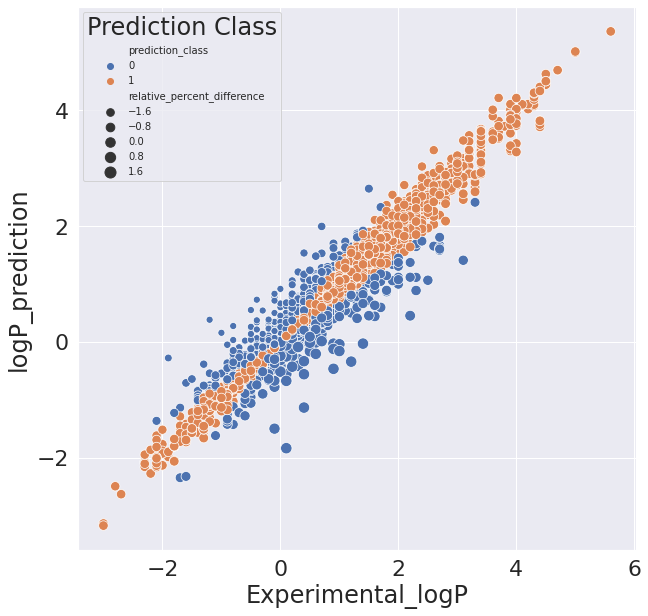

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='Experimental_logP',y='logP_prediction',data= X_test,hue='prediction_class',size='relative_percent_difference',sizes=(50,130))
plt.legend(loc='upper-left',prop={'size':10},fancybox=True,title='Prediction Class')
sns.set(font_scale=2)
sns.set_style('darkgrid')
plt.show()

In [ ]:
bad_predicted_logP=X_test[X_test['prediction_class']==0]

In [ ]:
good_predicted_logP=X_test[X_test['prediction_class']==1]

In [ ]:
indexes_bad_predicted=list(bad_predicted_logP.index)
indexes_good_predicted=list(good_predicted_logP.index)
smiles_for_bad_predicted_df=logP.loc[indexes_bad_predicted]
smiles_for_good_predicted_df=logP.loc[indexes_good_predicted]
smiles_for_bad_predicted_df.head(3)

,smiles,logP,mol,num_of_C_atoms,num_of_O_atoms,num_of_N_atoms,num_of_Cl_atoms,num_of_P_atoms,num_of_S_atoms,tpsa,...,Num_Spiro_Atoms,Num_Heterocycles,Num_Aliphatic_Carbocycles,Num_Aliphatic_Heterocycles,Num_Aliphatic_Rings,Num_Amide_Bonds,Num_Aromatic_Carbocycle,Num_Aromatic_Heterocyle,Num_Aromatic_rings,Heterotatoms/C_atoms
27,C=CC(P)P,0.4,<rdkit.Chem.rdchem.Mol object at 0x7feb1ccc2300>,3,0,0,0,2,0,0.00,...,0,0,0,0,0,0,0,0,0,0.666667
1324,CCCCC(N)N,0.3,<rdkit.Chem.rdchem.Mol object at 0x7feb1c9b43a0>,5,0,2,0,0,0,52.04,...,0,0,0,0,0,0,0,0,0,0.400000
13677,CCC(OC)P,0.8,<rdkit.Chem.rdchem.Mol object at 0x7feb1c756bc0>,4,1,0,0,1,0,9.23,...,0,0,0,0,0,0,0,0,0,0.500000


In [ ]:
bad_predicted_logP['smiles_molecule']=smiles_for_bad_predicted_df['smiles']
good_predicted_logP['smiles_molecule']=smiles_for_good_predicted_df['smiles']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
len(bad_predicted_logP)+len(good_predicted_logP)

2866

In [ ]:
bad_predicted_logP['absolute_error']=abs(bad_predicted_logP['Experimental_logP']-bad_predicted_logP['logP_prediction'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
bad_predicted_logP['prediction-experimental']=bad_predicted_logP['logP_prediction']-bad_predicted_logP['Experimental_logP']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
bad_predicted_logP_minus=bad_predicted_logP[bad_predicted_logP['prediction-experimental']<0]
bad_predicted_logP_plus=bad_predicted_logP[bad_predicted_logP['prediction-experimental']>0]

In [ ]:
len(bad_predicted_logP_minus)+len(bad_predicted_logP_plus)

752

In [ ]:
bad_predicted_logP_minus=bad_predicted_logP_minus.sort_values(by='relative_percent_difference',ascending=False)
bad_predicted_logP_plus=bad_predicted_logP_plus.sort_values(by='relative_percent_difference',ascending=False)

In [ ]:
bad_predicted_logP_minus1=bad_predicted_logP_minus.sort_values(by='absolute_error',ascending=False)
bad_predicted_logP_plus1=bad_predicted_logP_plus.sort_values(by='absolute_error',ascending=False)

In [ ]:
bad_predicted_logP_minus['mol']=bad_predicted_logP_minus['smiles_molecule'].apply(lambda x: Chem.MolFromSmiles(x))
bad_predicted_logP_plus['mol']=bad_predicted_logP_plus['smiles_molecule'].apply(lambda x: Chem.MolFromSmiles(x))
bad_predicted_logP_minus1['mol']=bad_predicted_logP_minus['smiles_molecule'].apply(lambda x: Chem.MolFromSmiles(x))
bad_predicted_logP_plus1['mol']=bad_predicted_logP_plus['smiles_molecule'].apply(lambda x: Chem.MolFromSmiles(x))

In [ ]:
bad_predicted_logP_minus.to_excel('tabla1_<0.xlsx',index=False)
bad_predicted_logP_plus.to_excel('tabla2_>0.xlsx',index=False)
bad_predicted_logP_minus1.to_excel('tabla3_<0.xlsx',index=False)
bad_predicted_logP_plus1.to_excel('tabla4>0.xlsx',index=False)

/usr/local/lib/python3.7/dist-packages/rdkit/Chem/Draw/IPythonConsole.py:254: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  % (maxMols))


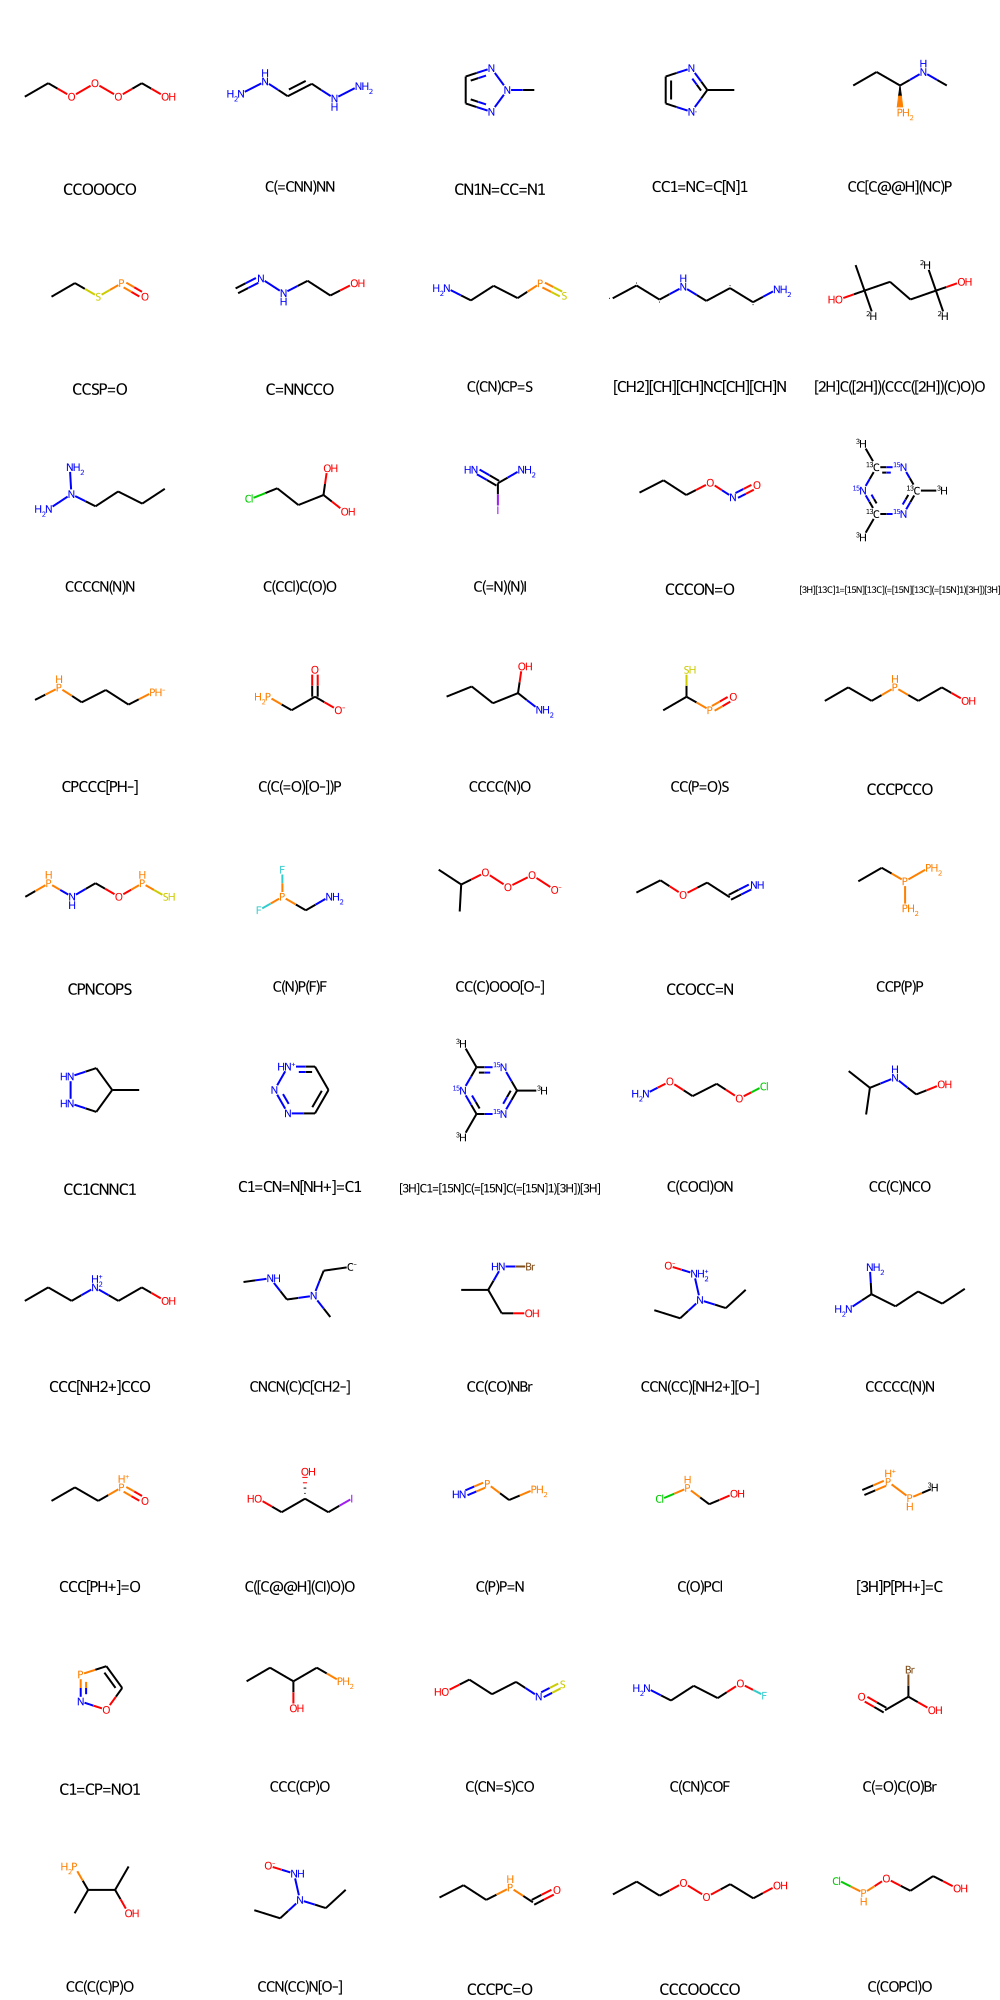

In [ ]:
mol_images2=bad_predicted_logP_minus.mol
Draw.MolsToGridImage(mol_images2, molsPerRow=5, useSVG=True, legends=list(bad_predicted_logP_minus['smiles_molecule']))

/usr/local/lib/python3.7/dist-packages/rdkit/Chem/Draw/IPythonConsole.py:254: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  % (maxMols))


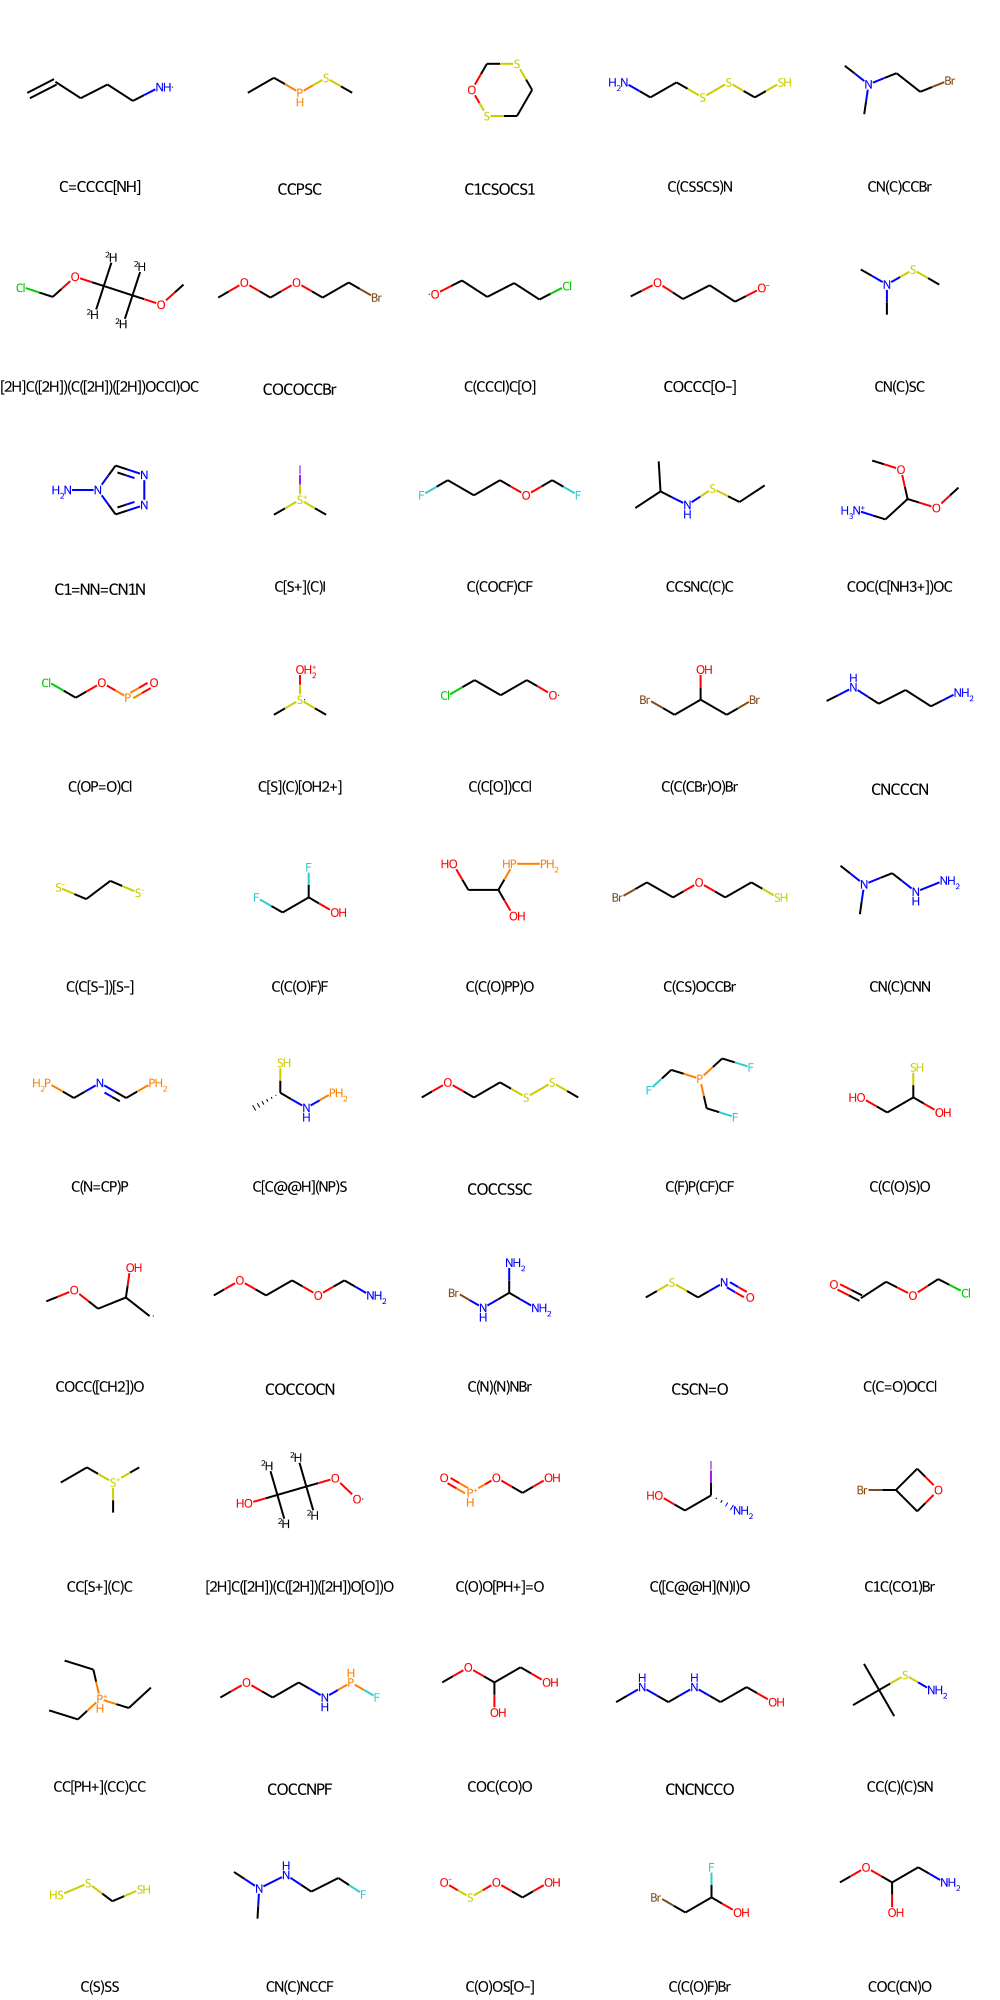

In [ ]:
mol_images3=bad_predicted_logP_plus.mol
Draw.MolsToGridImage(mol_images3, molsPerRow=5, useSVG=True, legends=list(bad_predicted_logP_plus['smiles_molecule']))

In [ ]:
good_predicted_logP['mol']=good_predicted_logP['smiles_molecule'].apply(lambda x: Chem.MolFromSmiles(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
good_predicted_logP.to_excel('good_predicted_logP.xlsx',index=False)

In [ ]:
bad_predicted_logP['mol']=bad_predicted_logP['smiles_molecule'].apply(lambda x: Chem.MolFromSmiles(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
bad_predicted_logP.to_excel('bad_predicted_logP.xlsx',index=False)

In [ ]:
bad_predicted_logP.columns

Index(['num_of_C_atoms', 'num_of_O_atoms', 'num_of_N_atoms', 'num_of_Cl_atoms',
       'num_of_P_atoms', 'num_of_S_atoms', 'tpsa', 'mol_w',
       'MaxAbsPartialCharge', 'MaxPartialCharge', 'MinAbsPartialCharge',
       'MinPartialCharge', 'num_valence_electrons', 'num_heteroatoms',
       'Num_Rings', 'Num_Rotatable_Bonds', 'Num_Saturated_Rings',
       'Num_Spiro_Atoms', 'Num_Heterocycles', 'Num_Aliphatic_Carbocycles',
       'Num_Aliphatic_Heterocycles', 'Num_Aliphatic_Rings', 'Num_Amide_Bonds',
       'Num_Aromatic_Carbocycle', 'Num_Aromatic_Heterocyle',
       'Num_Aromatic_rings', 'Heterotatoms/C_atoms', 'logP_prediction',
       'Experimental_logP', 'relative_percent_difference',
       '|relative_percent_difference|', 'prediction_class', 'smiles_molecule',
       'absolute_error', 'prediction-experimental', 'mol'],
      dtype='object')

In [ ]:
good_predicted_logP.columns

Index(['num_of_C_atoms', 'num_of_O_atoms', 'num_of_N_atoms', 'num_of_Cl_atoms',
       'num_of_P_atoms', 'num_of_S_atoms', 'tpsa', 'mol_w',
       'MaxAbsPartialCharge', 'MaxPartialCharge', 'MinAbsPartialCharge',
       'MinPartialCharge', 'num_valence_electrons', 'num_heteroatoms',
       'Num_Rings', 'Num_Rotatable_Bonds', 'Num_Saturated_Rings',
       'Num_Spiro_Atoms', 'Num_Heterocycles', 'Num_Aliphatic_Carbocycles',
       'Num_Aliphatic_Heterocycles', 'Num_Aliphatic_Rings', 'Num_Amide_Bonds',
       'Num_Aromatic_Carbocycle', 'Num_Aromatic_Heterocyle',
       'Num_Aromatic_rings', 'Heterotatoms/C_atoms', 'logP_prediction',
       'Experimental_logP', 'relative_percent_difference',
       '|relative_percent_difference|', 'prediction_class', 'smiles_molecule',
       'mol'],
      dtype='object')

In [ ]:
bad_heatmap=bad_predicted_logP.drop(columns=['relative_percent_difference',
       '|relative_percent_difference|', 'prediction_class', 'smiles_molecule',
       'mol'])

In [ ]:
good_heatmap=good_predicted_logP.drop(columns=['relative_percent_difference',
       '|relative_percent_difference|', 'prediction_class', 'smiles_molecule',
       'mol'])

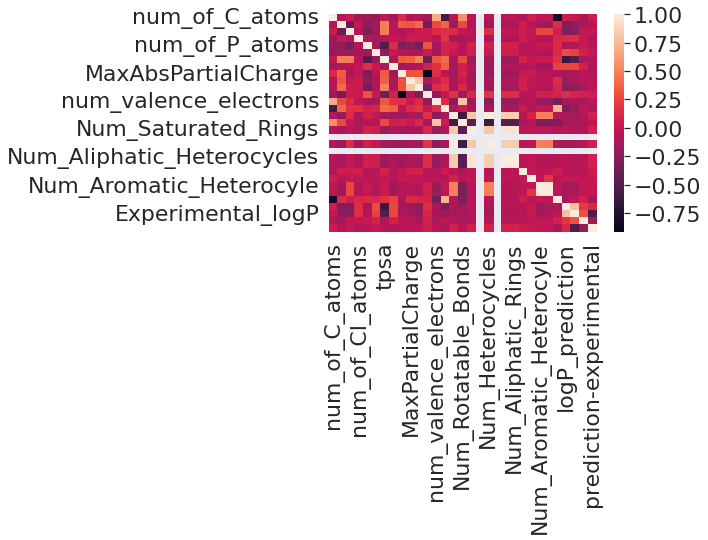

In [ ]:
sns.heatmap(bad_heatmap.corr())
sns.set(font_scale=.5)

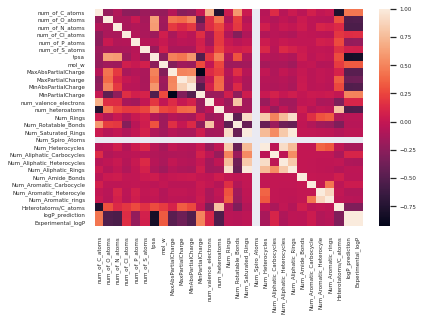

In [ ]:
sns.heatmap(good_heatmap.corr())
sns.set(font_scale=1)

In [ ]:
bad_heatmap.corr()

,num_of_C_atoms,num_of_O_atoms,num_of_N_atoms,num_of_Cl_atoms,num_of_P_atoms,num_of_S_atoms,tpsa,mol_w,MaxAbsPartialCharge,MaxPartialCharge,...,Num_Aliphatic_Rings,Num_Amide_Bonds,Num_Aromatic_Carbocycle,Num_Aromatic_Heterocyle,Num_Aromatic_rings,Heterotatoms/C_atoms,logP_prediction,Experimental_logP,absolute_error,prediction-experimental
num_of_C_atoms,1.000000,-0.065899,0.050393,-0.158165,-0.166997,-0.199367,0.000679,-0.135937,0.134060,-0.062984,...,-0.036859,-0.072996,0.059862,-0.026196,-0.013999,-0.821624,0.063636,0.020185,-0.087658,0.055614
num_of_O_atoms,-0.065899,1.000000,-0.396780,0.025325,-0.222468,-0.132825,0.485553,-0.074771,0.347465,0.313760,...,-0.114241,0.059752,-0.032775,-0.148186,-0.151936,0.154658,-0.294520,-0.225278,-0.136742,-0.045431
num_of_N_atoms,0.050393,-0.396780,1.000000,-0.068026,-0.325617,-0.162634,0.480133,-0.039776,-0.079220,0.000321,...,0.000412,0.048994,0.007462,0.267291,0.263937,0.063924,-0.296630,-0.260422,0.017415,0.008144
num_of_Cl_atoms,-0.158165,0.025325,-0.068026,1.000000,-0.072780,-0.142952,-0.031735,0.018182,-0.022897,0.046665,...,-0.080988,0.059347,-0.011806,-0.061227,-0.062437,0.129273,0.140364,0.161094,0.010765,-0.064718
num_of_P_atoms,-0.166997,-0.222468,-0.325617,-0.072780,1.000000,-0.133287,-0.498698,0.148022,-0.299020,-0.252266,...,0.079437,-0.060347,-0.020008,0.021285,0.016983,0.137147,-0.108909,-0.068834,0.023181,-0.040061
num_of_S_atoms,-0.199367,-0.132825,-0.162634,-0.142952,-0.133287,1.000000,-0.203216,0.029110,-0.043571,-0.085891,...,0.057832,-0.044012,-0.021132,-0.074373,-0.077172,0.120345,0.287120,0.236359,0.073848,0.017377
tpsa,0.000679,0.485553,0.480133,-0.031735,-0.498698,-0.203216,1.000000,-0.099622,0.340351,0.359944,...,-0.162746,0.098269,0.000078,0.032106,0.031543,0.175178,-0.622827,-0.490200,-0.095987,-0.073889
mol_w,-0.135937,-0.074771,-0.039776,0.018182,0.148022,0.029110,-0.099622,1.000000,-0.132056,-0.119131,...,-0.080971,-0.069224,-0.039350,-0.137132,-0.142368,0.243115,0.264885,0.263694,0.080817,-0.057332
MaxAbsPartialCharge,0.134060,0.347465,-0.079220,-0.022897,-0.299020,-0.043571,0.340351,-0.132056,1.000000,0.303265,...,-0.153383,0.019609,0.033552,-0.062999,-0.055292,-0.079505,-0.141124,-0.078848,-0.037573,-0.068543
MaxPartialCharge,-0.062984,0.313760,0.000321,0.046665,-0.252266,-0.085891,0.359944,-0.119131,0.303265,1.000000,...,-0.088368,0.073078,-0.013828,-0.024098,-0.026372,0.135511,-0.167156,-0.124217,-0.040481,-0.031636
